# **Emotion classification**

---

By: 
* Mohamed Reda MOUQED
* Ahmed El BAJDALI
* Zakaria AJERAME
* Aymane MERJANI
* Badr SAISSI



## Introduction


Speech Emotion Recognition (SER) is an important task in the field of Natural Language
Processing (NLP) and Human-Computer Interaction (HCI). It involves identifying emotions
expressed in speech and is essential for many applications, such as virtual assistants,
customer service, and mental health diagnosis. However, recognizing emotions from speech
is challenging due to the variability of emotions, speakers, and languages. Moreover, the
lack of labeled data and the complexity of the task make it even more challenging.
The IEMOCAP database is a dataset for speech emotion recognition research, containing a
large collection of audiovisual recordings of human interactions, where speakers display a
range of emotions. The database consists of more than 12 hours of audiovisual data,
including video, speech, motion capture of face, text transcriptions labeled with the VAD
(Valence-Arousal-Dominance) model and its corresponding emotion category. 

For our
project, we will use just the audio recordings for our data.
The main issue faced in speech emotion recognition from the IEMOCAP database is the large
number of features extracted from the speech signals. The challenge is to select the most
relevant features that can effectively discriminate between the different emotions.


## Objectives: 


The main goal of this project is to develop a SER model that can accurately recognize
emotions from speech. Specifically, we aim to achieve the following objectives :
1. Preprocess the speech signals and extract relevant features to represent the
emotional content of the speech signals.
2. To develop a classification model that can accurately classify the speech signals into
the emotion categories.
3. Evaluate the performance of the proposed model and compare it with other
emotion recognition models.

## Data preprocessing:

### Importation of libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import os
import pandas as pd
import librosa 
import librosa.display
import IPython.display as ipd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import xgboost as xgb
import sklearn.model_selection 
import sklearn.svm 
import sklearn.metrics
from sklearn.metrics import confusion_matrix 
import sklearn.ensemble 
from sklearn.ensemble import RandomForestRegressor
import sklearn.preprocessing 


### Loading Data

In [ ]:
root_path = '/content/gdrive/MyDrive/IEMOCAP_full_release_withoutVideos_sentenceOnly'

df = pd.read_csv(os.path.join(root_path, 'iemocap.csv'))

display(df)


,Unnamed: 0,session,method,gender,n_annotators,agreement,emotion,valence,activation,dominance,wav_path,MOCAP_rotated_path,MOCAP_head_path,MOCAP_hand_path,FA_ph_path,FA_st_path,FA_sy_path,FA_wd_path
0,0,1,script,F,3,3,neu,2.5,2.0,2.0,IEMOCAP_full_release/Session1/sentences/wav/Se...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...
1,1,1,script,F,3,2,fru,2.5,2.0,2.5,IEMOCAP_full_release/Session1/sentences/wav/Se...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...
2,2,1,script,F,0,0,xxx,2.0,2.0,2.5,IEMOCAP_full_release/Session1/sentences/wav/Se...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...
3,3,1,script,F,3,2,sur,2.5,3.0,3.0,IEMOCAP_full_release/Session1/sentences/wav/Se...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...
4,4,1,script,F,3,2,neu,2.0,3.0,3.0,IEMOCAP_full_release/Session1/sentences/wav/Se...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10034,10034,5,impro,F,3,2,neu,3.0,2.0,2.5,IEMOCAP_full_release/Session5/sentences/wav/Se...,IEMOCAP_full_release/Session5/sentences/MOCAP_...,IEMOCAP_full_release/Session5/sentences/MOCAP_...,IEMOCAP_full_release/Session5/sentences/MOCAP_...,IEMOCAP_full_release/Session5/sentences/Forced...,IEMOCAP_full_release/Session5/sentences/Forced...,IEMOCAP_full_release/Session5/sentences/Forced...,IEMOCAP_full_release/Session5/sentences/Forced...
10035,10035,5,impro,F,3,2,neu,2.5,3.5,4.0,IEMOCAP_full_release/Session5/sentences/wav/Se...,IEMOCAP_full_release/Session5/sentences/MOCAP_...,IEMOCAP_full_release/Session5/sentences/MOCAP_...,IEMOCAP_full_release/Session5/sentences/MOCAP_...,IEMOCAP_full_release/Session5/sentences/Forced...,IEMOCAP_full_release/Session5/sentences/Forced...,IEMOCAP_full_release/Session5/sentences/Forced...,IEMOCAP_full_release/Session5/sentences/Forced...
10036,10036,5,impro,F,3,2,neu,3.0,2.0,2.5,IEMOCAP_full_release/Session5/sentences/wav/Se...,IEMOCAP_full_release/Session5/sentences/MOCAP_...,IEMOCAP_full_release/Session5/sentences/MOCAP_...,IEMOCAP_full_release/Session5/sentences/MOCAP_...,IEMOCAP_full_release/Session5/sentences/Forced...,IEMOCAP_full_release/Session5/sentences/Forced...,IEMOCAP_full_release/Session5/sentences/Forced...,IEMOCAP_full_release/Session5/sentences/Forced...
10037,10037,5,impro,F,3,2,neu,2.5,2.0,2.5,IEMOCAP_full_release/Session5/sentences/wav/Se...,IEMOCAP_full_release/Session5/sentences/MOCAP_...,IEMOCAP_full_release/Session5/sentences/MOCAP_...,IEMOCAP_full_release/Session5/sen

Let's examine the dataset, and the distribution of target classes.

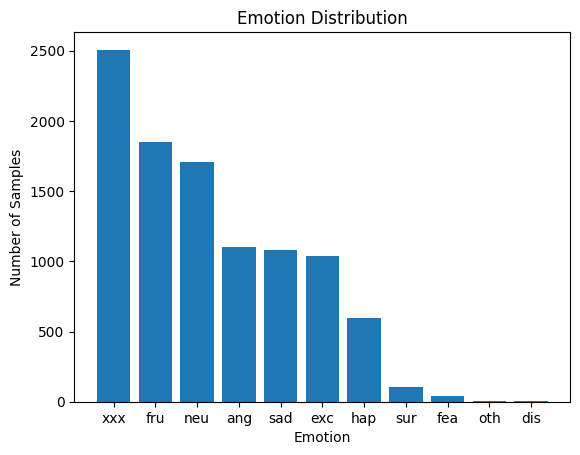

In [ ]:
counts = df['emotion'].value_counts()

# Plot of the distribution of emotions
fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)
ax.set_title('Emotion Distribution')
ax.set_xlabel('Emotion')
ax.set_ylabel('Number of Samples')
plt.show()

The distribution of emotion samples is very chaotic, with some classes very under-represented (and therefore we consider that is not very relevant to keep them).

### Sampling data
We choose to keep the classes 'ang', 'sad', 'sur', 'fea' and to proceed to the fusion of classes 'exc' and 'hap' into one new class labeled 'hap' (which seems to be a reasonable choice, that guarantees a good equilibrium of our new dataset (also justified by some tests on which samples of the classes 'hap' and 'exc' did poorly disjointly).

In [ ]:
df = pd.read_csv(os.path.join(root_path, 'iemocap.csv'))

emotion_classes = ['ang', 'neu', 'hap', 'exc', 'fru', 'sad']
filtered_df = df[df['emotion'].isin(emotion_classes)]

filtered_df['emotion'] = filtered_df['emotion'].replace('exc', 'hap')

class_sample_counts = {'ang': 1000, 'neu': 1000, 'hap': 1000, 'fru': 1000, 'sad': 1000}

resampled_dfs = []
for emotion, count in class_sample_counts.items():
    resampled_dfs.append(filtered_df[filtered_df['emotion'] == emotion].sample(n=count, replace=True, random_state=42))

resampled_df = pd.concat(resampled_dfs)


<ipython-input-5-a0edd4230ca2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['emotion'] = filtered_df['emotion'].replace('exc', 'hap')


### Extract features



We decided to choose the following features: 
* **Fundamental frequency (F0)**: The fundamental frequency, also known as F0 or the first harmonic, is the lowest frequency in a periodic waveform. In speech, it corresponds to the perceived pitch and is related to the vibration of the vocal folds. F0 is an important feature for emotion recognition because it can vary depending on the speaker's emotional state (e.g., higher pitch for excitement or lower pitch for sadness).

* **MFCCs coefficients:** Mel Frequency Cepstral Coefficients (MFCCs) are widely used features in speech and audio processing. They provide a compact representation of the short-term power spectrum of a sound, taking into account the non-linear human perception of frequency. MFCCs are derived from the Mel spectrogram and capture the spectral shape of the audio signal, making them useful for speech and emotion recognition tasks.

* **Mel spectrogram**: The Mel spectrogram is a time-frequency representation of an audio signal that takes into account the human perception of sound frequencies. It is obtained by applying the Mel-scale filter bank to the short-time Fourier transform (STFT) of an audio signal. The Mel spectrogram is useful in emotion recognition because it highlights the spectral content of the audio signal in a way that is more aligned with human perception.

* **Spectral centroid**: The spectral centroid is a measure that characterizes the "center of mass" of the power spectrum of an audio signal. It provides an indication of the overall spectral shape, which can be related to the perceived brightness or "sharpness" of the sound. The spectral centroid can vary with different emotions, making it a useful feature for emotion recognition.

* **Zero crossing rate**: The zero crossing rate (ZCR) is the rate at which an audio signal changes its sign (i.e., crosses the zero-amplitude line). It is a simple feature that provides information about the dominant frequency content and the noisiness of the audio signal. The ZCR can be affected by the speaker's emotional state, with higher ZCR values typically associated with more excited or stressed speech, and lower values with more calm or monotonic speech.

In [ ]:
def get_wav(file_path):
    x, sr = librosa.load(file_path, sr=16000)
    return x, sr

def extract_features(x, sr):
    mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=13)
    f0 = librosa.yin(y=x, sr=sr, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C5'))
    spectral_centroid = librosa.feature.spectral_centroid(y=x, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(x)
    mel_spectrogram = librosa.feature.melspectrogram(y=x, sr=sr)

    return {
        "mfccs": mfccs,
        "f0": f0,
        "spectral_centroid": spectral_centroid,
        "zero_crossing_rate": zero_crossing_rate,
        "mel_spectrogram": mel_spectrogram

    }


Creating a database called **new_db** with the chosen features :

In [ ]:
new_db = []
i = 0
for index, row in resampled_df.iterrows():
    entry = {}
    wav_path = os.path.join(root_path, row['wav_path'])
    x, sr = get_wav(wav_path)
    features = extract_features(x, sr)
    entry.update({"emotion": row['emotion'], "session": row['session']})
    entry.update(features)
    new_db.append(entry)
    i+= 1
    print(i)
new_db = pd.DataFrame(new_db)

In [ ]:
new_db

,emotion,session,mfccs,f0,spectral_centroid,zero_crossing_rate,mel_spectrogram
0,ang,4,"[[-509.01373, -487.6052, -450.66586, -366.7418...","[397.4445914940478, 387.62021682661043, 389.58...","[[2343.749740588464, 2418.528108554412, 1906.0...","[[0.1142578125, 0.173828125, 0.1943359375, 0.1...","[[0.0004879813, 0.0018654965, 0.0020649876, 0...."
1,ang,5,"[[-360.06314, -345.9235, -373.14514, -362.0406...","[115.71262819782551, 258.6128685242376, 259.11...","[[2044.714513193899, 2522.1638000584026, 2671....","[[0.0888671875, 0.1474609375, 0.16650390625, 0...","[[0.0052439254, 0.005342553, 0.014281257, 0.00..."
2,ang,5,"[[-505.56113, -482.23062, -486.1134, -489.628,...","[208.7305572487855, 65.3061224489796, 65.30612...","[[987.7012109882842, 784.2970648304437, 800.69...","[[0.01318359375, 0.02001953125, 0.025390625, 0...","[[0.05253556, 0.2807075, 0.18347766, 0.0650794..."
3,ang,1,"[[-401.08594, -375.95947, -378.08197, -383.241...","[533.3333333333334, 66.48502442500836, 72.7713...","[[1298.033233702398, 1171.9139902386323, 987.2...","[[0.041015625, 0.0537109375, 0.0673828125, 0.0...","[[0.006400815, 0.015426743, 0.06301936, 0.1033..."
4,ang,3,"[[-438.11047, -420.64566, -433.91022, -454.171...","[444.8559436523327, 287.2502060565308, 533.333...","[[2342.3805926421974, 2242.042525357654, 1989....","[[0.107421875, 0.1435546875, 0.1806640625, 0.1...","[[0.003040856, 0.003917563, 0.010664009, 0.011..."
...,...,...,...,...,...,...,...
4995,sad,5,"[[-557.4037, -504.26334, -477.7928, -461.77878...","[296.22452319380375, 69.25499636392085, 65.306...","[[1647.9383490370337, 1764.3517964328767, 2080...","[[0.05615234375, 0.08837890625, 0.12353515625,...","[[0.00029687668, 0.008120381, 0.018811822, 0.0..."
4996,sad,3,"[[-591.63, -564.8213, -561.63635, -565.7902, -...","[65.73577802697706, 77.37682777755387, 74.9437...","[[1408.609414143747, 1348.1690042570235, 1405....","[[0.04052734375, 0.07177734375, 0.0966796875, ...","[[0.0034041018, 0.0022365274, 0.0002737631, 0...."
4997,sad,2,"[[-470.37033, -435.87082, -426.11426, -418.109...","[509.0214759749063, 71.64733003882559, 69.2469...","[[1997.8349825846137, 2087.6813288433314, 2215...","[[0.0830078125, 0.123046875, 0.18701171875, 0....","[[0.0018482746, 0.00515161, 0.020556223, 0.029..."
4998,sad,1,"[[-477.8315, -450.3, -451.32318, -443.38507, -...","[504.5788000605687, 69.58741996359008, 214.774...","[[1091.176977941277, 951.3153684619838, 1016.6...","[[0.02001953125, 0.03564453125, 0.04833984375,...","[[0.011463654, 0.09134643, 0.076787286, 0.0176..."


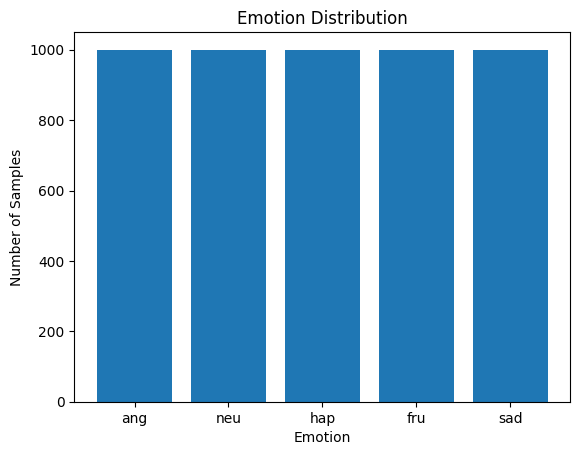

In [ ]:
counts = new_db['emotion'].value_counts()

fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)
ax.set_title('Emotion Distribution')
ax.set_xlabel('Emotion')
ax.set_ylabel('Number of Samples')
plt.show()

Creating a second database called **aggregated_db** from **new_db** but with calculating the **mean, standard deviation, min, max** and the **1st-3rd quartile** of each feature.

In [ ]:
def create_aggregated_df(existing_db):
    aggregated_features = []

    for index, row in existing_db.iterrows():
        features = {
            "emotion": row["emotion"],
            "session" : row["session"],

            
            "spectral_centroid_mean": np.mean(row["spectral_centroid"]),
            "spectral_centroid_std": np.std(row["spectral_centroid"]),
            "spectral_centroid_min": np.min(row["spectral_centroid"]),
            "spectral_centroid_max": np.max(row["spectral_centroid"]),
            "spectral_centroid_q1": np.percentile(row["spectral_centroid"], 25),
            "spectral_centroid_q3": np.percentile(row["spectral_centroid"], 75),
            
            "zero_crossing_rate_mean": np.mean(row["zero_crossing_rate"]),
            "zero_crossing_rate_std": np.std(row["zero_crossing_rate"]),
            "zero_crossing_rate_min": np.min(row["zero_crossing_rate"]),
            "zero_crossing_rate_max": np.max(row["zero_crossing_rate"]),
            "zero_crossing_rate_q1": np.percentile(row["zero_crossing_rate"], 25),
            "zero_crossing_rate_q3": np.percentile(row["zero_crossing_rate"], 75),
            
            "mel_spectrogram_mean": np.mean(row["mel_spectrogram"]),
            "mel_spectrogram_std": np.std(row["mel_spectrogram"]),
            "mel_spectrogram_min": np.min(row["mel_spectrogram"]),
            "mel_spectrogram_max": np.max(row["mel_spectrogram"]),
            "mel_spectrogram_q1": np.percentile(row["mel_spectrogram"], 25),
            "mel_spectrogram_q3": np.percentile(row["mel_spectrogram"], 75),

            "f0_mean": np.mean(row["f0"]),
            "f0_std": np.std(row["f0"]),
            "f0_min": np.min(row["f0"]),
            "f0_max": np.max(row["f0"]),
            "f0_q1": np.percentile(row["f0"], 25),
            "f0_q3": np.percentile(row["f0"], 75)


        }
        mfccs = row["mfccs"]
        for i in range(13):

          mfcc_mean = np.mean(mfccs[i])
          mfcc_std = np.std(mfccs[i])
          mfcc_q1 = np.percentile(mfccs[i], 25)
          mfcc_q3 = np.percentile(mfccs[i], 75)
          mfcc_min = np.min(mfccs[i])
          mfcc_max = np.max(mfccs[i])

          features[f'mfcc{i+1}_mean'] = mfcc_mean
          features[f'mfcc{i+1}_std'] = mfcc_std
          features[f'mfcc{i+1}_q1'] = mfcc_q1
          features[f'mfcc{i+1}_q3'] = mfcc_q3
          features[f'mfcc{i+1}_min'] = mfcc_min
          features[f'mfcc{i+1}_max'] = mfcc_max
        
                
        aggregated_features.append(features)

    return pd.DataFrame(aggregated_features)

aggregated_db = create_aggregated_df(new_db)

In [ ]:
aggregated_db

,emotion,session,spectral_centroid_mean,spectral_centroid_std,spectral_centroid_min,spectral_centroid_max,spectral_centroid_q1,spectral_centroid_q3,zero_crossing_rate_mean,zero_crossing_rate_std,...,mfcc12_q1,mfcc12_q3,mfcc12_min,mfcc12_max,mfcc13_mean,mfcc13_std,mfcc13_q1,mfcc13_q3,mfcc13_min,mfcc13_max
0,ang,4,1298.568430,497.128212,632.685148,3346.464646,1058.284574,1321.679312,0.086368,0.049568,...,-1.420618,4.918490,-17.601482,16.152803,-1.913620,9.818823,-7.081939,3.338448,-27.077644,25.067398
1,ang,5,1856.019825,496.927334,1177.324850,3295.235906,1451.747590,2157.421337,0.150336,0.040362,...,-3.879992,6.718189,-25.120289,22.600639,-2.185585,12.698516,-13.428082,7.682666,-32.030281,26.907066
2,ang,5,1749.840308,656.109997,678.743793,4439.493888,1346.104346,2034.008547,0.124892,0.073944,...,-17.512611,1.449915,-37.210476,31.631508,-0.089695,10.086214,-6.978904,6.200079,-28.023312,32.783192
3,ang,1,1247.646416,380.419255,695.750844,2398.055535,996.980078,1443.166805,0.074930,0.027512,...,-5.402585,6.771949,-19.369513,20.746664,-4.761263,9.413871,-11.725348,2.044323,-28.279966,10.326220
4,ang,3,1558.053011,713.041917,753.313770,3848.029191,1154.471849,1607.280983,0.119909,0.095869,...,3.389234,11.830567,-6.187120,28.398560,-4.982750,7.183219,-9.496667,-0.317668,-25.604050,9.954542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,sad,5,1710.697662,550.366137,786.857791,3788.720508,1337.060599,2029.322297,0.120763,0.044400,...,5.911932,16.619764,-12.769482,28.709507,-0.310789,9.557338,-5.513061,5.926001,-21.581936,21.446751
4996,sad,3,1479.045173,591.057461,798.933215,3955.900130,1156.331801,1628.357781,0.102072,0.073119,...,2.593840,12.329403,-10.270664,30.896294,-3.497780,5.837475,-7.212434,0.486818,-22.413525,9.123768
4997,sad,2,1167.530928,392.969577,558.478365,2639.527843,990.484515,1140.801389,0.070471,0.041789,...,4.580812,11.068441,-4.118435,28.419846,-3.718843,6.412349,-6.207508,0.314916,-20.316202,7.747983
4998,sad,1,1285.116928,625.500383,896.454818,3492.366786,1003.763320,1160.323923,0.086120,0.073749,...,6.437535,11.430041,-2.995235,20.229164,-4.197798,5.755565,-7.710410,-0.360357,-20.641212,14.176588


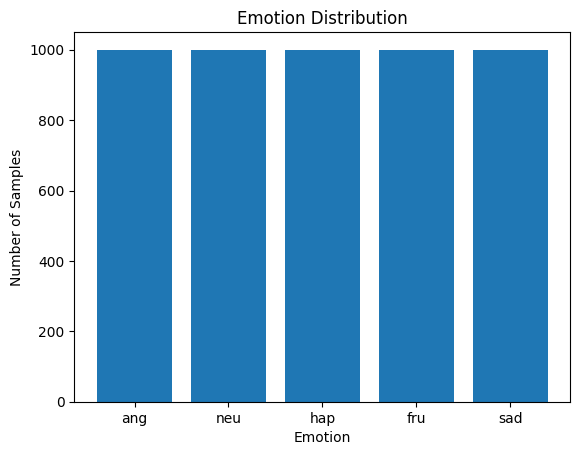

In [ ]:
counts = aggregated_db['emotion'].value_counts()

fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)
ax.set_title('Emotion Distribution')
ax.set_xlabel('Emotion')
ax.set_ylabel('Number of Samples')
plt.show()

### Creating a testing data with the session 5 

In [ ]:
train_data = aggregated_db[aggregated_db['session'] != 5]
test_data = aggregated_db[aggregated_db['session'] == 5]

train_data = train_data.drop(columns=['session'])
test_data = test_data.drop(columns=['session'])

In [ ]:
len(train_data)

3883

In [ ]:
len(test_data)

1117

## Classification models with results

### Random Forest

Classification Report:
              precision    recall  f1-score   support

         ang       0.54      0.59      0.56       167
         fru       0.27      0.30      0.29       204
         hap       0.43      0.22      0.29       273
         neu       0.35      0.37      0.36       231
         sad       0.57      0.77      0.65       242

    accuracy                           0.44      1117
   macro avg       0.43      0.45      0.43      1117
weighted avg       0.43      0.44      0.42      1117



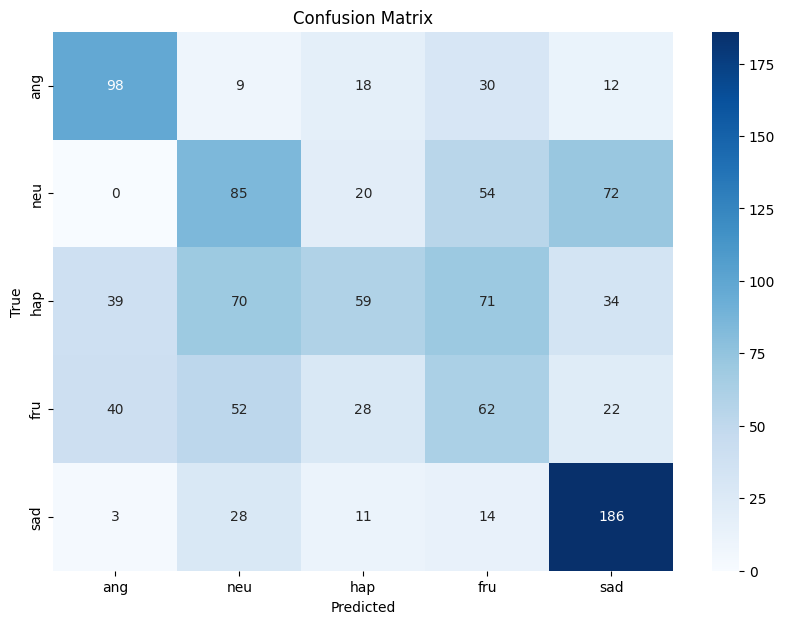

Feature Importances:
                      importance
mfcc3_std               0.023632
mfcc1_max               0.020333
mel_spectrogram_mean    0.019272
mfcc1_std               0.018846
mfcc5_std               0.018217
...                          ...
mfcc13_q3               0.007146
mfcc9_min               0.007063
f0_max                  0.004391
f0_min                  0.001208
mel_spectrogram_min     0.000000

[102 rows x 1 columns]


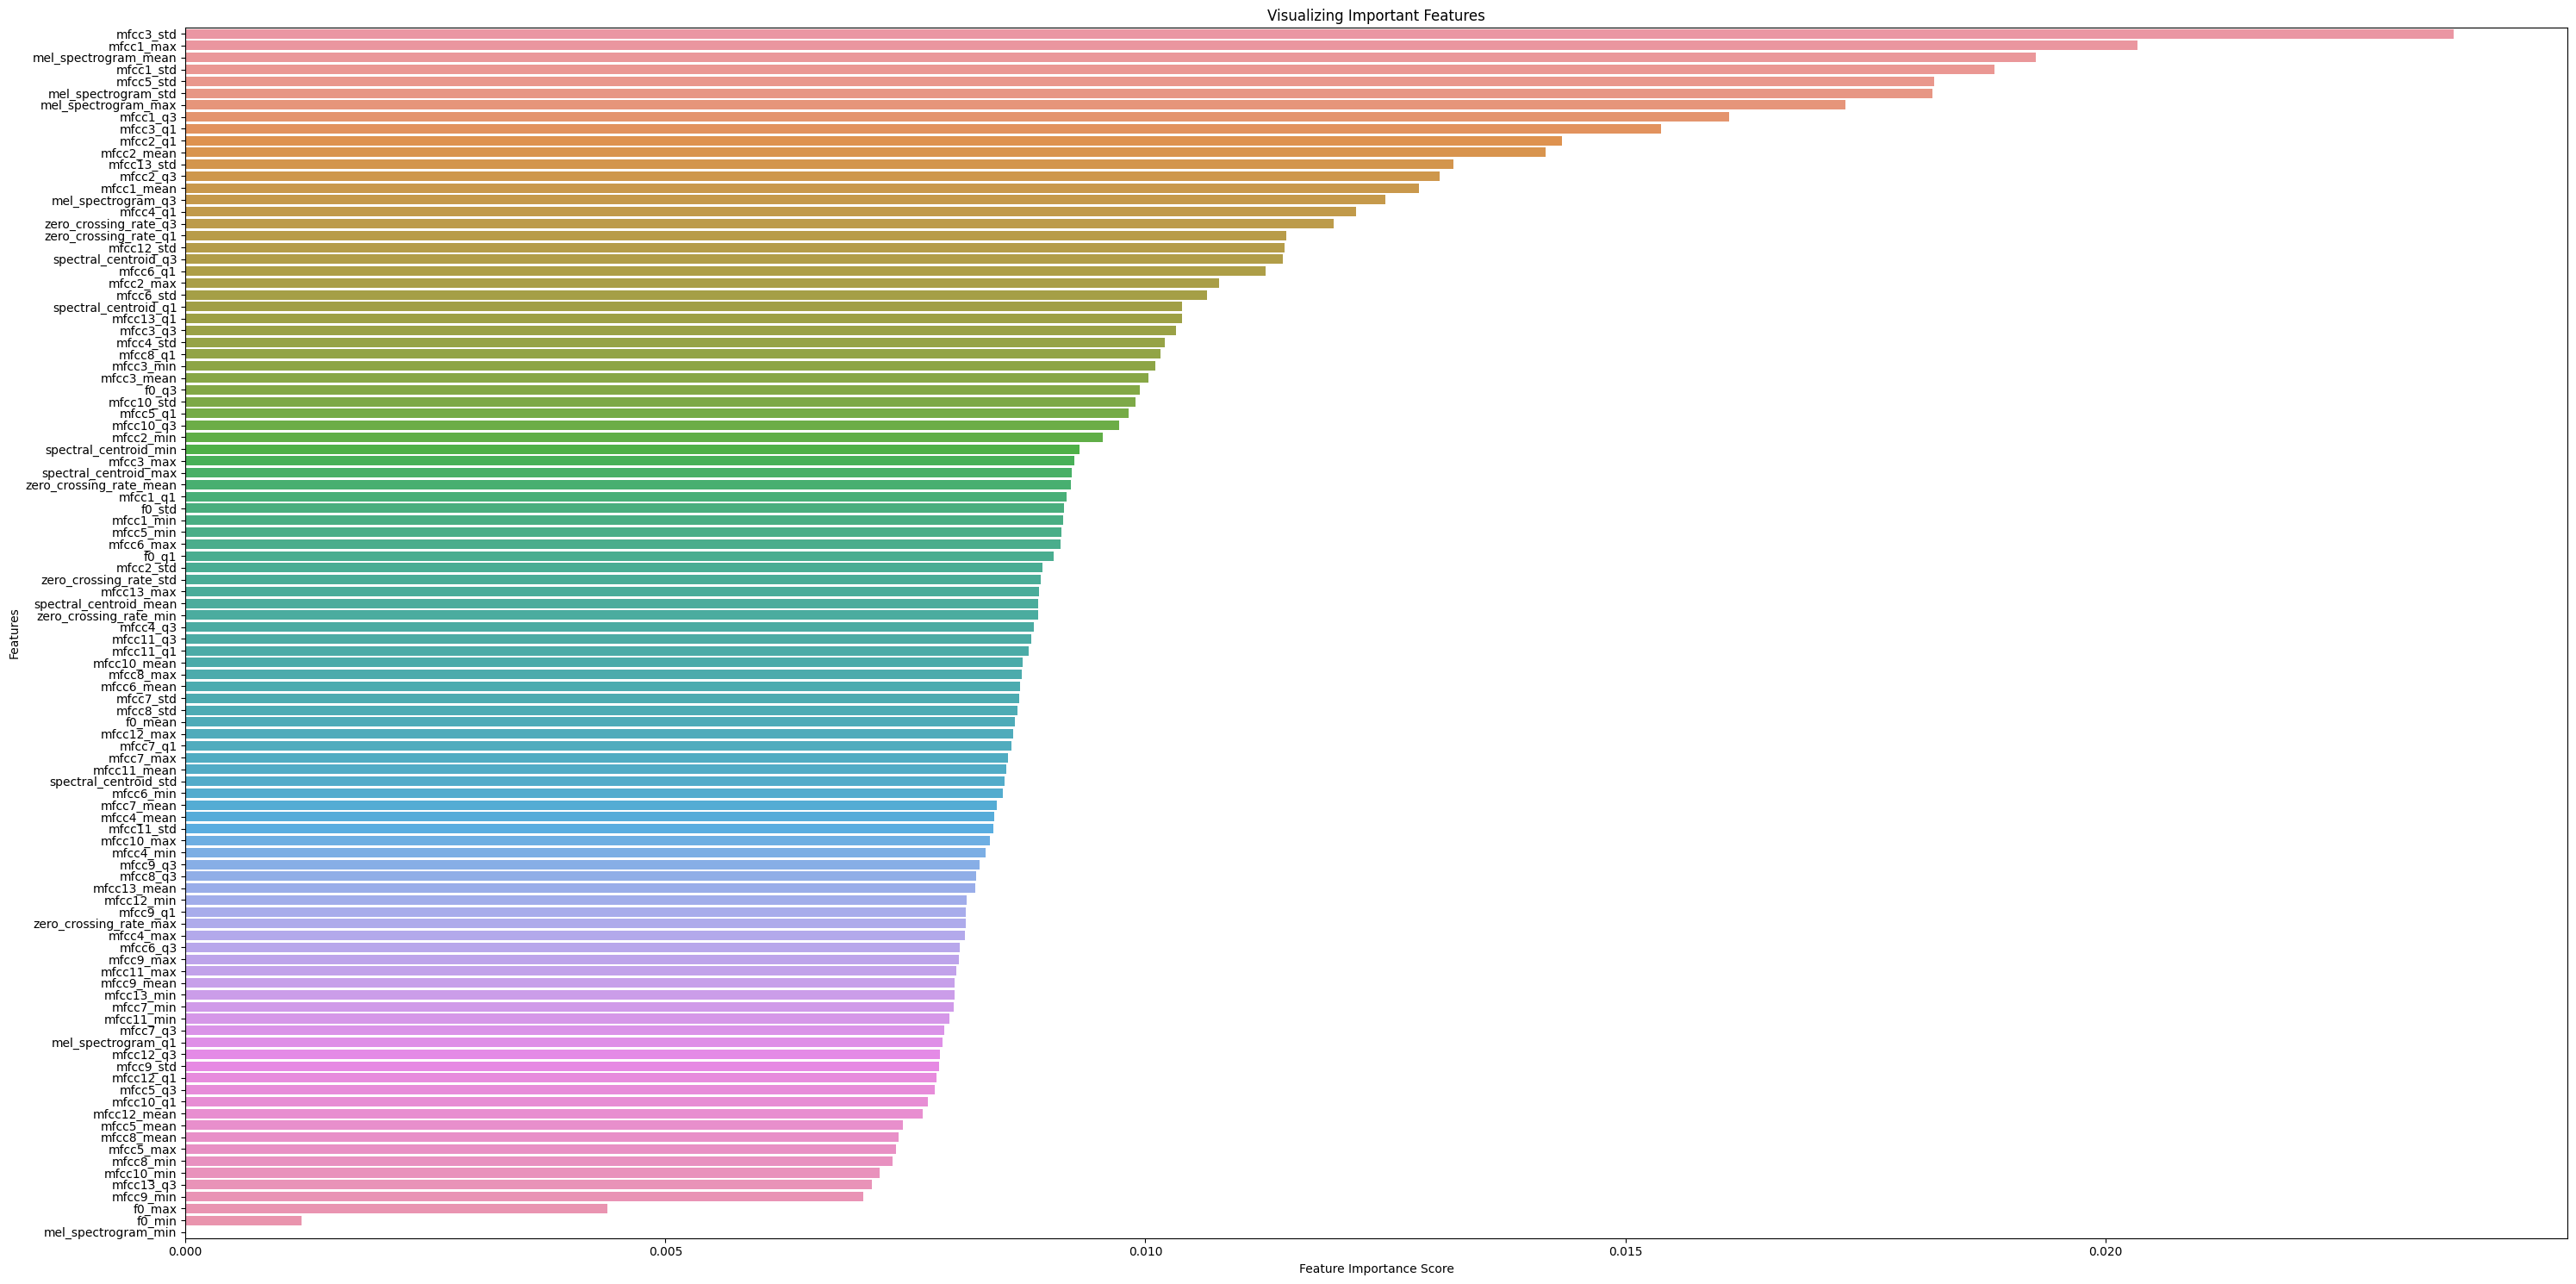

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns


X_train = train_data.drop("emotion", axis=1)
y_train = train_data["emotion"]

X_test = test_data.drop("emotion", axis=1)
y_test = test_data["emotion"]

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

emotion_classes = ['ang', 'neu', 'hap', 'fru', 'sad']

cm = confusion_matrix(y_test, y_pred, labels=emotion_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_classes, yticklabels=emotion_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
feature_importances = pd.DataFrame(rf_classifier.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

plt.figure(figsize=(30, 15))
sns.barplot(x='importance', y=feature_importances.index, data=feature_importances)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.tight_layout()
plt.show()

Random Forest CV scores:
[0.69369369 0.72972973 0.7027027  0.68556701 0.67783505]
Mean CV score: 0.6979056375963593
Classification Report:
              precision    recall  f1-score   support

         ang       0.49      0.54      0.52       167
         fru       0.30      0.35      0.32       204
         hap       0.49      0.26      0.34       273
         neu       0.36      0.37      0.36       231
         sad       0.58      0.75      0.66       242

    accuracy                           0.45      1117
   macro avg       0.44      0.46      0.44      1117
weighted avg       0.45      0.45      0.44      1117



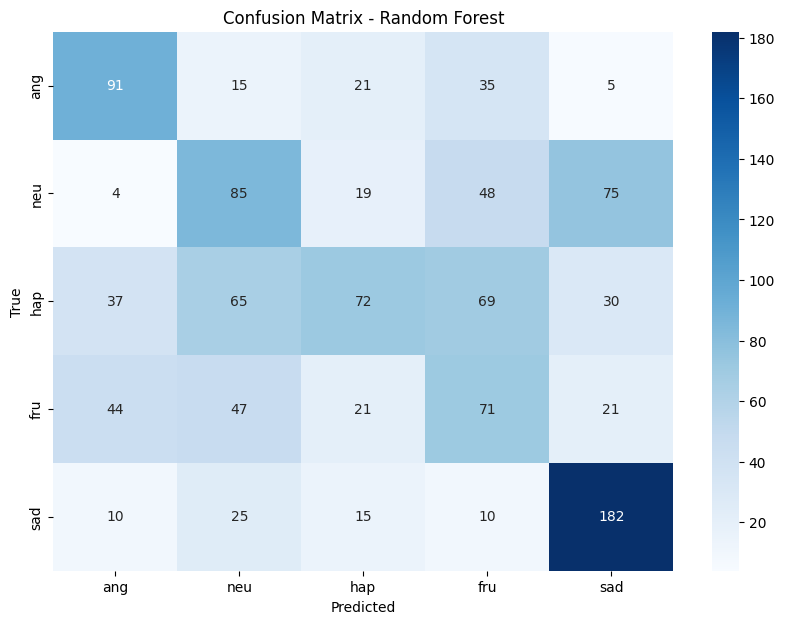

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X_train = train_data.drop("emotion", axis=1)
y_train = train_data["emotion"]

X_test = test_data.drop("emotion", axis=1)
y_test = test_data["emotion"]

# Normalizing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

rf_cv_scores = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=5)
print("Random Forest CV scores:")
print(rf_cv_scores)
print("Mean CV score:", np.mean(rf_cv_scores))

y_pred_rf = rf_classifier.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

emotion_classes = ['ang', 'neu', 'hap', 'fru', 'sad']

cm = confusion_matrix(y_test, y_pred_rf, labels=emotion_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_classes, yticklabels=emotion_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Random Forest CV scores:
[0.69369369 0.72972973 0.7027027  0.68556701 0.67783505]
Mean CV score: 0.6979056375963593
Classification Report:
              precision    recall  f1-score   support

         ang       0.49      0.54      0.52       167
         fru       0.30      0.35      0.32       204
         hap       0.49      0.26      0.34       273
         neu       0.36      0.37      0.36       231
         sad       0.58      0.75      0.66       242

    accuracy                           0.45      1117
   macro avg       0.44      0.46      0.44      1117
weighted avg       0.45      0.45      0.44      1117



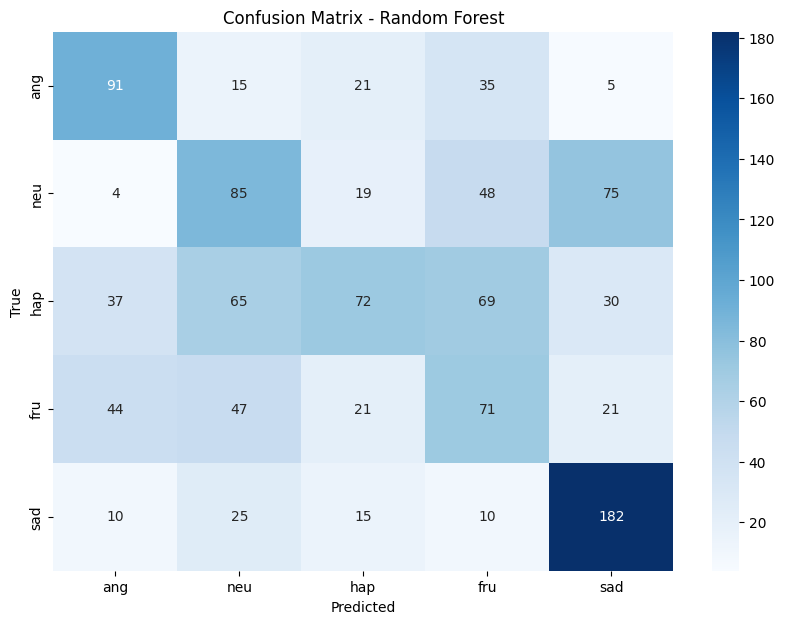

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X_train = train_data.drop("emotion", axis=1)
y_train = train_data["emotion"]

X_test = test_data.drop("emotion", axis=1)
y_test = test_data["emotion"]

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

rf_cv_scores = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=5)
print("Random Forest CV scores:")
print(rf_cv_scores)
print("Mean CV score:", np.mean(rf_cv_scores))

y_pred_rf = rf_classifier.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

emotion_classes = ['ang', 'neu', 'hap', 'fru', 'sad']

cm = confusion_matrix(y_test, y_pred_rf, labels=emotion_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_classes, yticklabels=emotion_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Accuracy is a bit better (+1%) After Normalizing




### XGBoost

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

XGBoost CV scores:
[0.71042471 0.72072072 0.69369369 0.69201031 0.70747423]
Mean CV score: 0.7048647321843199
Classification Report:
              precision    recall  f1-score   support

         ang       0.51      0.51      0.51       167
         fru       0.32      0.31      0.32       204
         hap       0.48      0.35      0.41       273
         neu       0.37      0.37      0.37       231
         sad       0.55      0.73      0.63       242

    accuracy                           0.45      1117
   macro avg       0.45      0.45      0.45      1117
weighted avg       0.45      0.45      0.45      1117



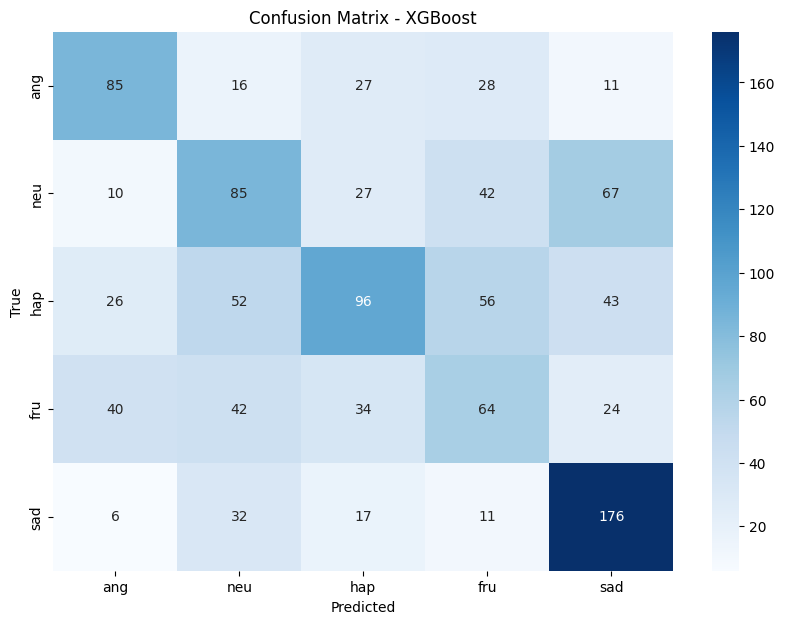

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_classifier = XGBClassifier(n_estimators = 250, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_classifier.fit(X_train_scaled, y_train_encoded)

xgb_cv_scores = cross_val_score(xgb_classifier, X_train_scaled, y_train_encoded, cv=5)
print("XGBoost CV scores:")
print(xgb_cv_scores)
print("Mean CV score:", np.mean(xgb_cv_scores))

y_pred_encoded = xgb_classifier.predict(X_test_scaled)

y_pred_xgb = label_encoder.inverse_transform(y_pred_encoded)

print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

cm = confusion_matrix(y_test, y_pred_xgb, labels=emotion_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_classes, yticklabels=emotion_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - XGBoost')
plt.show()




**XGB Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [5, 7],
    'n_estimators': [100, 250],
}

grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train_encoded)
best_params = grid_search.best_params_
print("Best parameters found by grid search:")
print(best_params)

best_xgb_classifier = grid_search.best_estimator_

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best parameters found by grid search:
{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 250}


In [ ]:
feature_importances = best_xgb_classifier.feature_importances_
indices = np.argsort(feature_importances)[::-1]

print("Feature importances:")
for i, index in enumerate(indices):
    print(f"{i + 1}. {X_train.columns[index]}: {feature_importances[index]}")


# Top k features
k = 15
selected_features = X_train.columns[indices[:k]]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

Feature importances:
1. spectral_centroid_mean: 0.10508773475885391
2. spectral_centroid_min: 0.08348995447158813
3. spectral_centroid_std: 0.07800889760255814
4. spectral_centroid_q3: 0.07184244692325592
5. zero_crossing_rate_mean: 0.06364337354898453
6. zero_crossing_rate_std: 0.06283982843160629
7. mel_spectrogram_mean: 0.06273742020130157
8. spectral_centroid_q1: 0.06269878149032593
9. spectral_centroid_max: 0.06068802997469902
10. zero_crossing_rate_max: 0.06003238260746002
11. mel_spectrogram_std: 0.05909698083996773
12. zero_crossing_rate_q1: 0.05900419130921364
13. zero_crossing_rate_min: 0.058194600045681
14. mel_spectrogram_min: 0.05749726668000221
15. zero_crossing_rate_q3: 0.055138226598501205


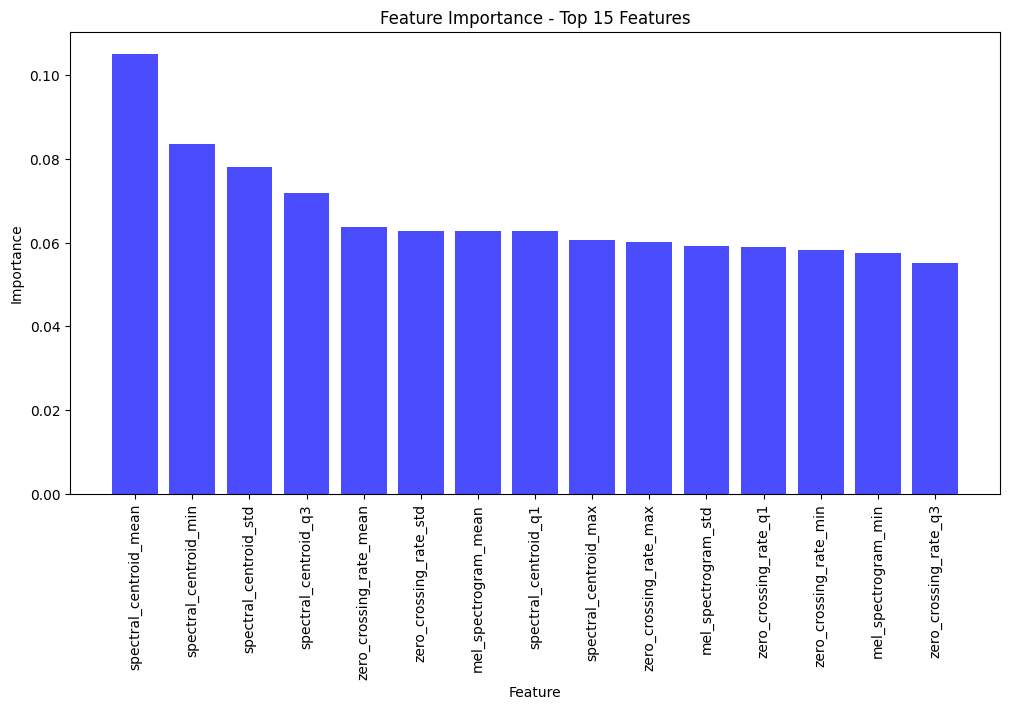

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(range(k), feature_importances[indices[:k]], align='center', color='b', alpha=0.7)
plt.xticks(range(k), selected_features, rotation='vertical')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance - Top 15 Features")

plt.show()

Classification Report (top k features):
              precision    recall  f1-score   support

         ang       0.44      0.54      0.48       167
         fru       0.27      0.31      0.29       204
         hap       0.37      0.24      0.29       273
         neu       0.35      0.36      0.35       231
         sad       0.64      0.69      0.66       242

    accuracy                           0.42      1117
   macro avg       0.41      0.43      0.42      1117
weighted avg       0.42      0.42      0.41      1117



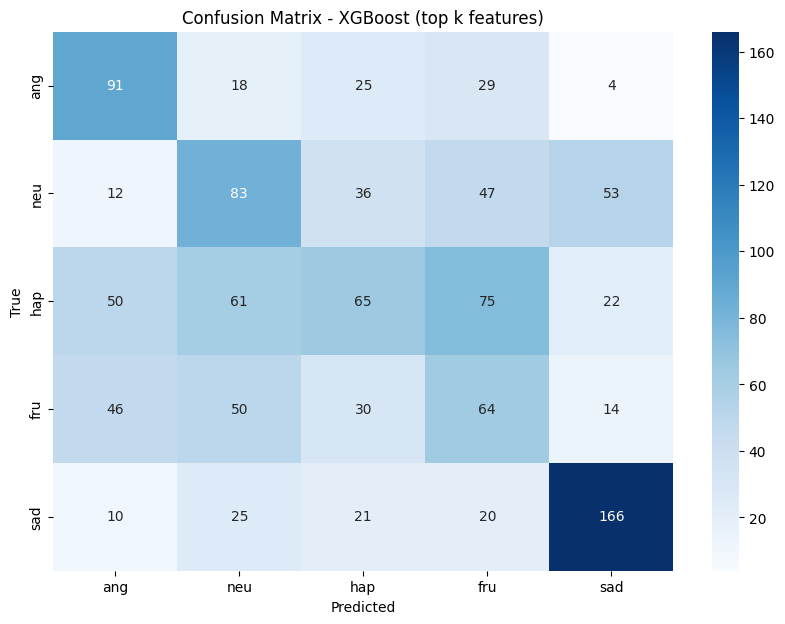

In [ ]:
best_xgb_classifier.fit(X_train_selected, y_train_encoded)

y_pred_encoded_selected = best_xgb_classifier.predict(X_test_selected)
y_pred_xgb_selected = label_encoder.inverse_transform(y_pred_encoded_selected)

print("Classification Report (top k features):")
print(classification_report(y_test, y_pred_xgb_selected))

cm = confusion_matrix(y_test, y_pred_xgb_selected, labels=emotion_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_classes, yticklabels=emotion_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - XGBoost (top k features)')
plt.show()

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Classification Report (Stacking):
              precision    recall  f1-score   support

         ang       0.50      0.46      0.47       167
         fru       0.25      0.39      0.31       204
         hap       0.39      0.23      0.29       273
         neu       0.29      0.32      0.31       231
         sad       0.62      0.58      0.60       242

    accuracy                           0.39      1117
   macro avg       0.41      0.40      0.40      1117
weighted avg       0.41      0.39      0.39      1117



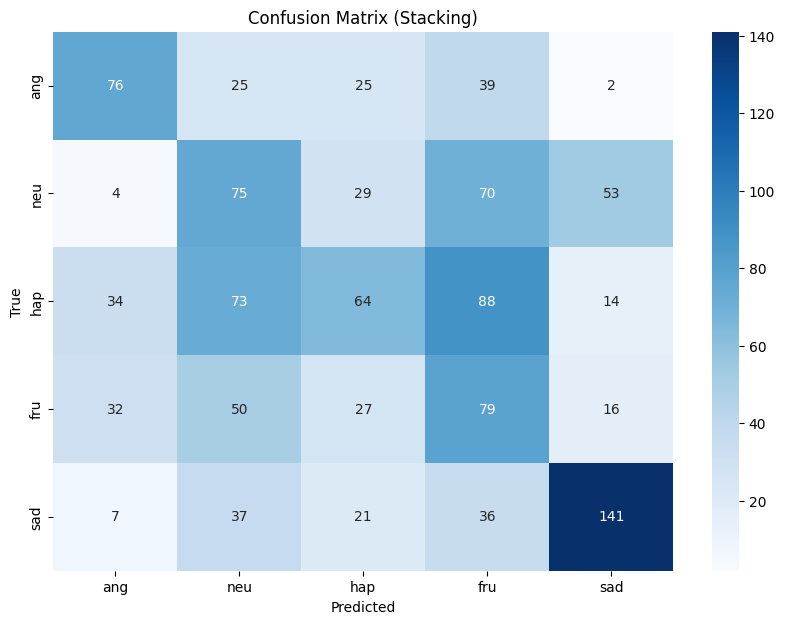

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=1)
svc_classifier = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=1)

stacking_classifier = StackingClassifier(
    estimators=[
        ('random_forest', random_forest_classifier),
        ('svc', svc_classifier),
        ('xgboost', best_xgb_classifier)
    ],
    final_estimator=XGBClassifier( random_state=1)
)
stacking_classifier.fit(X_train_selected, y_train_encoded)
y_pred_encoded = stacking_classifier.predict(X_test_selected)
y_pred_stacking = label_encoder.inverse_transform(y_pred_encoded)

print("Classification Report (Stacking):")
print(classification_report(y_test, y_pred_stacking))

cm = confusion_matrix(y_test, y_pred_stacking, labels=emotion_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_classes, yticklabels=emotion_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Stacking)')
plt.show()

###CNN

We 'll use just Mel-Spectrogram data as an input for this classifier

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


def generate_spectrogram(x, sr):
    spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128, fmax=8000)
    spectrogram = librosa.power_to_db(spectrogram)
    return spectrogram

df_spectrograms = []
i = 0
for _, row in resampled_df.iterrows():
    wav_path = os.path.join(root_path, row['wav_path'])
    x, sr = get_wav(wav_path)
    spectrogram = generate_spectrogram(x, sr)
    df_spectrograms.append((row['emotion'], spectrogram))
    i+=1
    print(i)

df_spectrograms = pd.DataFrame(df_spectrograms, columns=["emotion", "spectrogram"])



In [ ]:
df_spectrograms

,emotion,spectrogram
0,ang,"[[-33.115967, -27.292057, -26.850826, -23.9538..."
1,ang,"[[-22.803436, -22.722513, -18.452335, -22.2558..."
2,ang,"[[-12.795467, -5.51746, -7.364168, -11.865563,..."
3,ang,"[[-21.937649, -18.117258, -12.005261, -9.85493..."
4,ang,"[[-25.170042, -24.069841, -19.720798, -19.2436..."
...,...,...
4995,sad,"[[-35.27424, -20.904238, -17.255692, -14.98628..."
4996,sad,"[[-24.679976, -26.50426, -35.62625, -33.462044..."
4997,sad,"[[-27.332335, -22.880571, -16.870567, -15.3444..."
4998,sad,"[[-19.406773, -10.3930855, -11.147107, -17.544..."


In [ ]:
df_spectrograms['spectrogram'][2]

array([[-12.795467 ,  -5.51746  ,  -7.364168 , ..., -22.8096   ,
        -19.106098 , -19.601498 ],
       [-11.2779045,  -5.426128 ,  -7.822693 , ..., -15.207876 ,
        -14.266354 , -15.85278  ],
       [-14.123329 ,  -8.548693 ,  -6.6245003, ..., -17.24427  ,
        -17.687437 , -16.693813 ],
       ...,
       [-53.921818 , -53.921818 , -53.921818 , ..., -53.921818 ,
        -53.921818 , -53.921818 ],
       [-53.921818 , -53.921818 , -53.921818 , ..., -53.921818 ,
        -53.921818 , -53.921818 ],
       [-53.921818 , -53.921818 , -53.921818 , ..., -53.921818 ,
        -53.921818 , -53.921818 ]], dtype=float32)

In [ ]:
max_length = max([spec.shape[1] for spec in df_spectrograms["spectrogram"]])
max_length

1067

In [ ]:
def pad_spectrogram(spec, max_length):
    pad_len = max_length - spec.shape[1]
    padded_spec = np.pad(spec, ((0, 0), (0, pad_len)))
    return padded_spec

In [ ]:
df_spectrograms["spectrogram"] = df_spectrograms["spectrogram"].apply(lambda x: pad_spectrogram(x, max_length))


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_sample_weight

emotion_labels = df_spectrograms["emotion"].values
label_encoder = LabelEncoder()
emotion_labels_encoded = label_encoder.fit_transform(emotion_labels)
emotion_labels_one_hot = to_categorical(emotion_labels_encoded)

spectrograms = np.stack(df_spectrograms["spectrogram"].values) / 255.0  
X_train, X_test, y_train, y_test = train_test_split(spectrograms, emotion_labels_one_hot, test_size=0.2, random_state=42, stratify=emotion_labels)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

input_shape = (X_train.shape[1], X_train.shape[2], 1)
num_classes = 5

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_datagen.fit(X_train)

class_weights = compute_sample_weight(class_weight='balanced', y=emotion_labels)
class_weights = {i: weight for i, weight in enumerate(class_weights)}

batch_size = 32
epochs = 25

history = model.fit(train_datagen.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    class_weight=class_weights,
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=epochs)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 1065, 32)     320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 532, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 530, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 265, 64)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 263, 128)      73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 131, 128)     0

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.3370327949523926
Test accuracy: 0.41499999165534973


In [ ]:
#cellule test
batch_size = 30
epochs = 40

"""history = model.fit(train_datagen.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    class_weight=class_weights,
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=epochs)"""

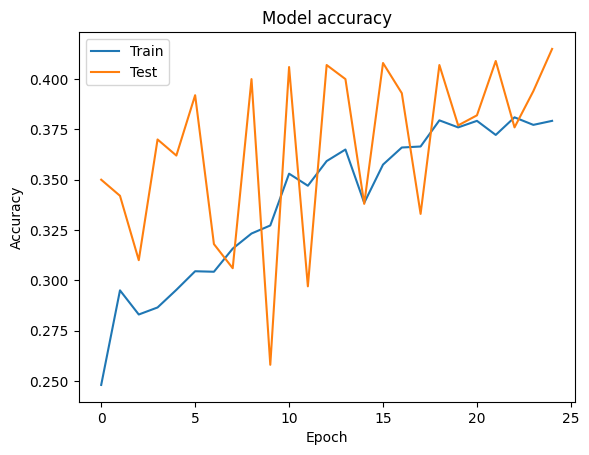

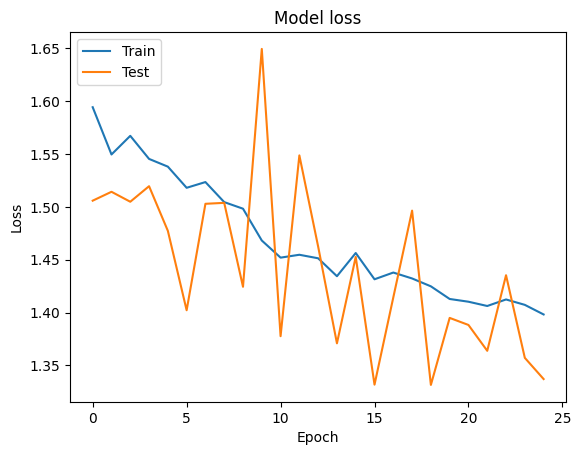

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

32/32 [==============================] - 1s 32ms/step


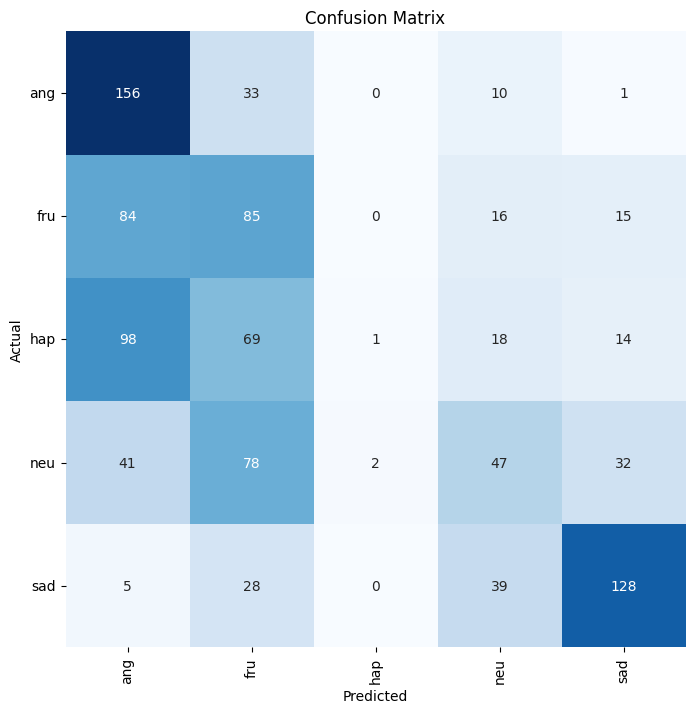

Classification Report:
               precision    recall  f1-score   support

         ang       0.41      0.78      0.53       200
         fru       0.29      0.42      0.34       200
         hap       0.33      0.01      0.01       200
         neu       0.36      0.23      0.28       200
         sad       0.67      0.64      0.66       200

    accuracy                           0.42      1000
   macro avg       0.41      0.42      0.37      1000
weighted avg       0.41      0.42      0.37      1000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(0.5, len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=90)
plt.yticks(ticks=np.arange(0.5, len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=0)
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

A relatively good overall performance (compared to those of the previously tested models). We notice however that samples from the class 'hap' are almost never predicted, no valid reason for this appears at first sight this class (created by the fusion of 'hap' and 'exc' previously). This phenomenon is only encountered for this model.